In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [13]:
peak_throughput_fp16 = 71E12
peak_throughput_int6 = peak_throughput_fp16 * 8 / 6 * 1
peak_throughput_int4 = peak_throughput_fp16 * 8 / 4 * 1
mem_bandwidth = 936E9

cut_off_fp16 = peak_throughput_fp16 / mem_bandwidth
cut_off_int6 = peak_throughput_int6 / mem_bandwidth
cut_off_int4 = peak_throughput_int4 / mem_bandwidth

In [14]:
print(cut_off_fp16, cut_off_int4)

75.85470085470085 151.7094017094017


## Roofline

In [15]:
linestyle   = 'solid'
linewidth   = 1.5
tick_size   = 10
label_size  = 11
legend_size = 10

title_yloc  = -0.26

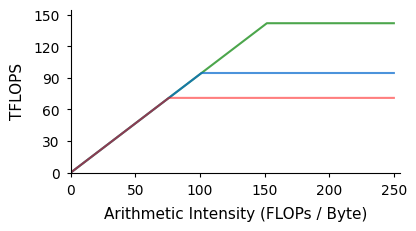

In [17]:
color_r = 'red'
color_g = 'green'
color_b = (0, 102/255, 204/255)
x_lim = 250
y_lim = 150

figwidth    = 4
figheight   = 2.2

f, ax = plt.subplots(1)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f1, = ax.plot([0, cut_off_int4, x_lim], [0, peak_throughput_int4, peak_throughput_int4], linewidth=linewidth, color=color_g, alpha=0.7)
f2, = ax.plot([0, cut_off_int6, x_lim], [0, peak_throughput_int6, peak_throughput_int6], linewidth=linewidth, color=color_b, alpha=0.7)
f3, = ax.plot([0, cut_off_fp16, x_lim], [0, peak_throughput_fp16, peak_throughput_fp16], linewidth=linewidth, color=color_r, alpha=0.5)

yaxis_lim = np.array([0, y_lim+5, y_lim/5]) * 1E12
ax.set_ylim(yaxis_lim[:2])
ax.set_yticks(np.arange(yaxis_lim[0], yaxis_lim[1] + 1, yaxis_lim[2]))
ax.set_ylabel('TFLOPS', fontsize=label_size, labelpad=6)
ax.set_yticklabels((ax.get_yticks() // 1E12).astype('int'))
ax.tick_params(axis='y', which='major', labelsize=tick_size, length=3, pad=5)

xaxis_lim = np.array([0, x_lim+5, x_lim/5])
ax.set_xlim(xaxis_lim[:2])
ax.set_xticks(np.arange(xaxis_lim[0], xaxis_lim[1], xaxis_lim[2]))
ax.set_xlabel('Arithmetic Intensity (FLOPs / Byte)', fontsize=label_size, labelpad=6)
ax.set_xticklabels((ax.get_xticks()).astype('int'))
ax.tick_params(axis='x', which='major', labelsize=tick_size, length=3, pad=5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='gray', linewidth=0.7)

f.savefig('roofline_plot.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=600, pad_inches=0.1)

In [38]:
color_r = 'red'
color_g = 'green'

figwidth    = 4
figheight   = 2.2

f, ax = plt.subplots(1)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f1, = ax.plot([0, cut_off_int4, 150], [0, peak_throughput, peak_throughput], linewidth=linewidth, color=color_g, alpha=0.8)
f2, = ax.plot([0, cut_off_fp16, 150], [0, peak_throughput, peak_throughput], linewidth=linewidth, color=color_r, alpha=0.6)

yaxis_lim = np.array([0, 78, 15]) * 1E12
ax.set_ylim(yaxis_lim[:2])
ax.set_yticks(np.arange(yaxis_lim[0], yaxis_lim[1] + 1, yaxis_lim[2]))
ax.set_ylabel('TFLOPS', fontsize=label_size, labelpad=6)
ax.set_yticklabels((ax.get_yticks() // 1E12).astype('int'))
ax.tick_params(axis='y', which='major', labelsize=tick_size, length=3, pad=5)

xaxis_lim = np.array([0, 151, 30])
ax.set_xlim(xaxis_lim[:2])
ax.set_xticks(np.arange(xaxis_lim[0], xaxis_lim[1], xaxis_lim[2]))
ax.set_xlabel('Arithmetic Intensity (FLOPs / Byte)', fontsize=label_size, labelpad=6)
ax.set_xticklabels((ax.get_xticks()).astype('int'))
ax.tick_params(axis='x', which='major', labelsize=tick_size, length=3, pad=5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='gray', linewidth=0.7)

f.savefig('roofline.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=600, pad_inches=0.1)

array([ 0., 15., 30., 45., 60., 75.])

In [10]:
print(acc_bitvert_mod)

[0.2  0.38 0.23 0.96 0.4  0.22 0.8 ]


In [11]:
network       = ['VGG16', 'Res.34', 'Res.50', 'ViT-S', 'ViT-B',  'NRPC', 'SST2']
bit_baseline  = np.array([8 for _ in range(7)])

################ Conservative Compression with BitVert ################
bit_bitvert_cons = np.array([6.04, 6.09, 6.22, 6.33, 6.25, 6.22, 6.22])
ratio_bitvert_cons = np.divide(bit_baseline, bit_bitvert_cons)

################ Moderate Compression with BitVert ################
bit_bitvert_modr  = np.array([4.32, 4.50, 4.79, 5.19, 5.07, 5.01, 5.02])
ratio_bitvert_modr = np.divide(bit_baseline, bit_bitvert_modr)

################ PTQ 5-bit weight ################
bit_ptq  = np.array([5.09, 5.07, 5.24, 5.08, 5.08, 5.06, 5.06])
ratio_ptq  = np.divide(bit_baseline, bit_ptq)

In [12]:
print(f'bitvert conservative accuracy loss: {np.average(acc_bitvert_cons)}')
print(f'bitvert conservative accuracy loss: {np.average(acc_bitvert_mod)}')
print(f'bitvert conservative compression ratio: {np.average(ratio_bitvert_cons)}')
print(f'bitvert conservative compression ratio: {np.average(ratio_bitvert_modr)}')


bitvert conservative accuracy loss: 0.2557142857142866
bitvert conservative accuracy loss: 0.4557142857142854
bitvert conservative compression ratio: 1.2914965965980785
bitvert conservative compression ratio: 1.6585061059642328


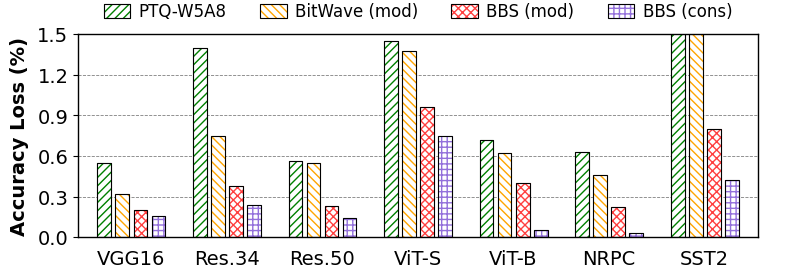

In [13]:
f, ax = plt.subplots(1, 1)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f1 = ax.bar(x - width*1.5 - distance, acc_ptq_w5a8, width,  
               color='white', edgecolor='green', linewidth=hatchwidth, hatch="////")
f2 = ax.bar(x - width*1.5 - distance, acc_ptq_w5a8, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f3 = ax.bar(x - width*0.5 - distance*0.5, acc_bitwave_mod, width,  
               color='white', edgecolor='orange', linewidth=hatchwidth, hatch="\\\\\\\\")
f4 = ax.bar(x - width*0.5 - distance*0.5, acc_bitwave_mod, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f5 = ax.bar(x + width*0.5 + distance*0, acc_bitvert_mod, width,  
               color='white', edgecolor=(1,0.25,0.25), linewidth=hatchwidth, hatch="xxxx")
f6 = ax.bar(x + width*0.5 + distance*0, acc_bitvert_mod, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f7 = ax.bar(x + width*1.5 + distance*0.5, acc_bitvert_cons, width,  
               color='white', edgecolor='mediumpurple', linewidth=hatchwidth, hatch="+++")
f8 = ax.bar(x + width*1.5 + distance*0.5, acc_bitvert_cons, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)


yaxis_lim = [0, 1.501, 0.3]
ax.set_ylim(yaxis_lim[:2])
ax.set_yticks(np.arange(yaxis_lim[0], yaxis_lim[1], yaxis_lim[2]))
ax.set_ylabel('Accuracy Loss (%)', fontsize=label_size+1, weight='bold', labelpad=6)
ax.set_yticklabels(np.round(ax.get_yticks(), 1))

ax.set_xticks(x-distance*0.25,)
ax.set_xticklabels(network)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelsize=tick_size, pad=5) # remove x ticks
ax.tick_params(axis='y', which='major', labelsize=tick_size)

ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='gray', linewidth=0.6)
ax.set_axisbelow(True)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width

#ax.set_title('(a) 2-bit Weight & Activation', y=title_yloc, fontsize=title_size, weight='bold')

ax.margins(x=0.03)

legend_loc  = (0.12, 0.9)
f.legend([(f1,f2), (f3,f4), (f5,f6), (f7,f8)], ['PTQ-W5A8', 'BitWave (mod)', 'BBS (mod)', 'BBS (cons)'], 
         loc=legend_loc, fontsize=legend_size, ncol=4, columnspacing=2, frameon=False, 
         handlelength=1.6, handleheight=0.9, handletextpad=0.5)


f.subplots_adjust(
    left=0.01,
    right=0.981,
)
#f.savefig('accuracy.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)

In [ ]:
color_r = (242/255, 96/255, 96/255)
color_g = (196/255, 214/255, 160/255)
color_b = (115/255, 163/255, 230/255)
color_o = (244/255, 149/255, 70/255)

f, ax = plt.subplots(1, 1)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

f1 = ax.bar(x - width*2 - distance, acc_ptq_w5a8, width,  
               color='white', edgecolor='mediumpurple', linewidth=hatchwidth, hatch="/////")
f2 = ax.bar(x - width*2 - distance, acc_ptq_w5a8, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f3 = ax.bar(x - width*1 - distance*0.5, acc_bitwave_mod, width,  
               color=color_o, )
f4 = ax.bar(x - width*1 - distance*0.5, acc_bitwave_mod, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f5 = ax.bar(x + width*0 + distance*0, acc_bitwave_cons, width,  
               color=color_r)
f6 = ax.bar(x + width*0 + distance*0, acc_bitwave_cons, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f7 = ax.bar(x + width*1 + distance*0.5, acc_bitvert_mod, width,  
               color=color_g, linewidth=hatchwidth)
f8 = ax.bar(x + width*1 + distance*0.5, acc_bitvert_mod, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f9 = ax.bar(x + width*2 + distance, acc_bitvert_cons, width,  
               color=color_b)
f10 = ax.bar(x + width*2 + distance, acc_bitvert_cons, width, label=network, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)


yaxis_lim = [0, 1.501, 0.3]
ax.set_ylim(yaxis_lim[:2])
ax.set_yticks(np.arange(yaxis_lim[0], yaxis_lim[1], yaxis_lim[2]))
ax.set_ylabel('Accuracy Loss (%)', fontsize=label_size+1, weight='bold', labelpad=6)
ax.set_yticklabels(np.round(ax.get_yticks(), 1))

ax.set_xticks(x-distance*0.25,)
ax.set_xticklabels(network)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelsize=tick_size, pad=5) # remove x ticks
ax.tick_params(axis='y', which='major', labelsize=tick_size)

ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='gray', linewidth=0.6)
ax.set_axisbelow(True)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width

#ax.set_title('(a) 2-bit Weight & Activation', y=title_yloc, fontsize=title_size, weight='bold')

ax.margins(x=0.03)

legend_loc  = (0.08, 0.91)
f.legend([(f1,f2), (f3,f4), (f5,f6), (f7,f8), (f9, f10)], ['PTQ (cons)', 'Bit-flip (mod)', 'Bit-flip (cons)', 'BBS (mod)', 'BBS (cons)'], 
         loc=legend_loc, fontsize=legend_size, ncol=5, columnspacing=1.5, frameon=False, 
         handlelength=1., handleheight=0.9, handletextpad=0.5)


f.subplots_adjust(
    left=0.01,
    right=0.981,
)
#f.savefig('accuracy.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)